# Loan Defaulter Prediction
## Author: Ankit Kapoor

### Solution Approach
* Import all the required libraries and functions
* Read dataset and perform exploratory analysis
* Handling Outliers
* Missing value imputation
* SMOTE (Synthetic Minority Oversampling Technique)
* Feature selection
* Transform data
* Transforming categorical values using One-Hot encoding
* Split dataset
* Training and Cross Validation

# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import svm,metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import math
pd.set_option("display.max_rows", None, "display.max_columns", None) #to display all columns and rows.
pd.options.display.float_format = '{:.3f}'.format
%matplotlib inline

## Reading Dataset

In [2]:
df = pd.read_csv("/Users/ankitkpr93/Downloads/Junior_DS_programming_test/PT_data.csv")

## Exploratory Analysis

In [3]:
print ("Original shape = ",df.shape)
df.head(5)

Original shape =  (2247, 77)


Wages  AgeOfSubject Gender  Insurance  AgeOfFile  \
0 4982.285       603.812    Mr.     28.281    223.146   
1 3791.546       605.891    Ms.      0.000     83.534   
2 5680.125       729.003    Mr.      0.000     38.379   
3 4357.584       325.798   Miss      0.000     15.620   
4 7569.298       492.492   Mrs.     58.465    251.823   

   NonDiscretionarySpending  VedaScore  Groceries  NonSaccLoans  \
0                   657.397        501    241.857       329.230   
1                  1661.180        517    725.566       560.003   
2                   928.532        644    396.286       708.532   
3                  2299.661        490    284.009       436.646   
4                  3930.618        473    498.899      2233.912   

   DiscretionarySpending  PostalCode  PreviousLoans MaritalStatus  \
0                454.120        6430          0.000        Single   
1               1110.353        4506          0.000       Married   
2               1216.598        4152          0.000        Single   
3               1542.750        4007          0.000        Single   
4               1650.000        4557          0.000        Single   

                 EmploymentSector  Utilities EmploymentStatus Dependants  \
0               Mining, Oil & Gas      0.000        Full time          0   
1            Medical & Healthcare    309.177        Part time          1   
2            Government & Defence      0.000        Full time          0   
3  Customer Service & Call Center    191.015        Full time          0   
4            Government & Defence     58.927        Full time          0   

     EmploymentLength  CreditEnquiries3  CreditEnquiries1  CreditEnquiries6  \
0  3 months to 1 year                 3                 3                 6   
1    More than 1 year                 3                 2                 4   
2    More than 1 year                 2                 1                 2   
3  3 months to 1 year                 0                 0                 1   
4    More than 1 year                 2                 2                 2   

  EmploymentPayFrequency  CurrentBalance_all  AvailableBalance_all  \
0            Fortnightly          -54175.396                 0.044   
1            Fortnightly           -8555.613                 0.275   
2            Fortnightly          -11680.009              1015.410   
3                 Weekly             183.634               183.634   
4            Fortnightly          -20069.698               749.034   

   OpeningBalance_all  TotalCredits_all  TotalDebits_all  ClosingBalance_all  \
0          -53769.298         23501.401       -23907.499          -54175.396   
1           -8359.428         28058.316       -28284.476           -8555.613   
2          -11170.148         26830.111        27339.972          -11680.009   
3             101.695         27706.690       -27624.751             183.634   
4          -24439.635         73058.337        68688.400          -20069.698   

   DaysInNegative_all  CurrentBalance_tran  AvailableBalance_tran  \
0              23.000                  nan                    nan   
1             108.000            -8457.669                  0.000   
2              99.000            -1160.830                534.589   
3              22.000               57.761                 57.761   
4              24.000              771.155                  0.000   

   OpeningBalance_tran  TotalCredits_tran  TotalDebits_tran  \
0                  nan                nan               nan   
1            -8412.679           1285.834         -1360.799   
2            -1581.591          24409.858         23989.097   
3                7.095          21702.186        -21651.520   
4               -0.033          48063.587         47292.399   

   ClosingBalance_tran  DaysInNegative_tran  CurrentBalance_sav  \
0                  nan                  nan             -51.513   
1            -8457.669               92.000             -97.944   
2            -1

In [4]:
#To know the type of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 77 columns):
Wages                       2241 non-null float64
AgeOfSubject                2247 non-null float64
Gender                      2247 non-null object
Insurance                   2241 non-null float64
AgeOfFile                   2247 non-null float64
NonDiscretionarySpending    2241 non-null float64
VedaScore                   2247 non-null int64
Groceries                   2241 non-null float64
NonSaccLoans                2241 non-null float64
DiscretionarySpending       2241 non-null float64
PostalCode                  2247 non-null int64
PreviousLoans               2092 non-null float64
MaritalStatus               2237 non-null object
EmploymentSector            2246 non-null object
Utilities                   2241 non-null float64
EmploymentStatus            2246 non-null object
Dependants                  2237 non-null object
EmploymentLength            2246 non-null object
Cre

In [5]:
categorical_columns = ["Gender", "EmploymentPayFrequency", "MaritalStatus", "EmploymentSector",\
                       "EmploymentStatus", "EmploymentLength", "Dependants","IsDefault"]
numerical_columns = list(df.drop(categorical_columns,axis=1).columns)
df.describe()

Wages  AgeOfSubject  Insurance  AgeOfFile  \
count   2241.000      2247.000   2241.000   2247.000   
mean    5284.539       450.704    158.592    134.525   
std     4797.934       150.230    369.607    114.021   
min        0.000         0.000      0.000     -1.100   
25%     3375.152       337.887      0.000     40.859   
50%     4429.260       425.601     58.124    106.535   
75%     6328.223       551.122    194.128    200.107   
max   122292.643      1422.399   7907.724    504.042   

       NonDiscretionarySpending  VedaScore  Groceries  NonSaccLoans  \
count                  2241.000   2247.000   2241.000      2241.000   
mean                   1932.787    590.486    349.770       694.066   
std                    2373.995    146.299    303.485       844.923   
min                       0.000      0.000      0.000         0.000   
25%                     952.346    499.000    142.312        63.459   
50%                    1603.362    587.000    276.782       491.191   
75%                    2473.421    684.000    475.398       980.195   
max                   86378.600   1093.000   4448.284      9225.570   

       DiscretionarySpending  PostalCode  PreviousLoans  Utilities  \
count               2241.000    2247.000       2092.000   2241.000   
mean                1205.184    3573.089          0.491    137.944   
std                  866.915    1380.876          0.737    271.690   
min                  110.000     800.000          0.000      0.000   
25%                  703.703    2326.500          0.000      0.000   
50%                 1020.400    3156.000          0.000      0.000   
75%                 1438.488    4500.000          1.000    211.376   
max                13200.000    7322.000          4.000   5881.579   

       CreditEnquiries3  CreditEnquiries1  CreditEnquiries6  \
count          2247.000          2247.000          2247.000   
mean              1.939             1.331             2.709   
std               1.596             1.027             2.073   
min               0.000             0.000             0.000   
25%               1.000             1.000             1.000   
50%               2.000             1.000             2.000   
75%               3.000             2.000             4.000   
max              16.000             8.000            18.000   

       CurrentBalance_all  AvailableBalance_all  OpeningBalance_all  \
count            2173.000              2173.000            2173.000   
mean           -33273.471              1442.593          -31499.371   
std            129547.201             17452.893          125697.219   
min          -1579522.186           -712723.198        -1566904.724   
25%            -12181.950                24.497           -9613.032   
50%               -86.174               374.792              13.805   
75%               415.954              1255.749             892.639   
max            405492.494            200499.453          397267.310   

       TotalCredits_all  TotalDebits_all  ClosingBalance_all  \
count          2173.000         2173.000            2173.000   
mean          36710.928       -14290.339          -33237.408   
std           42943.587        60031.222          127851.755   
min            1425.556      -903790.404        -1579522.186   
25%           18807.536       -33484.748          -10946.320   
50%           26792.524       -19518.741              -0.671   
75%           40956.003        16757.026             562.089   
max          954174.815       955293.053          401373.786   

       DaysInNegative_all  CurrentBalance_tran  AvailableBalance_tran  \
count            2173.000             1933.000               1933.000   
mean               26.141              187.475                813.476   
std                46.343             5298.269               3626.289   
min                 0.000           -80714.821              -1575.365   
25%                 0.000                1.353                  6.006   
50%         

**Assumptions inferrred from the above summary:**

1. the AgeOfSubject has minimum value of 0, which cannot be possible.
2. The AgeOfFile has minimum value as negative, which cannot be the case.
3. The value of wage should not be zero.

Hence, these records will be removed from the dataset.

In [6]:
df = df.loc[df["AgeOfSubject"] != 0]
df = df.loc[df["AgeOfFile"] >= 0]
df = df.loc[df["Wages"] > 0]
print(df.shape)
df.describe()

(2008, 77)


Wages  AgeOfSubject  Insurance  AgeOfFile  \
count   2008.000      2008.000   2008.000   2008.000   
mean    5685.235       457.885    161.658    139.559   
std     4734.497       142.028    375.125    112.621   
min       16.500       237.820      0.000      0.011   
25%     3623.785       343.068      0.000     46.060   
50%     4618.224       430.749     64.702    112.216   
75%     6536.992       554.708    199.328    204.479   
max   122292.643      1422.399   7907.724    504.042   

       NonDiscretionarySpending  VedaScore  Groceries  NonSaccLoans  \
count                  2008.000   2008.000   2008.000      2008.000   
mean                   1910.023    593.518    351.878       707.276   
std                    1589.204    131.313    301.493       838.891   
min                       0.000    209.000      0.000         0.000   
25%                     971.718    499.000    146.178        86.936   
50%                    1610.123    585.000    278.240       505.903   
75%                    2472.948    677.000    475.573       991.126   
max                   36850.000   1093.000   4448.284      8926.233   

       DiscretionarySpending  PostalCode  PreviousLoans  Utilities  \
count               2008.000    2008.000       1866.000   2008.000   
mean                1201.988    3558.000          0.495    135.434   
std                  866.528    1379.700          0.740    241.752   
min                  110.000     800.000          0.000      0.000   
25%                  707.661    2324.000          0.000      0.000   
50%                 1019.885    3142.000          0.000      0.000   
75%                 1434.740    4431.000          1.000    211.437   
max                13200.000    7321.000          4.000   3850.000   

       CreditEnquiries3  CreditEnquiries1  CreditEnquiries6  \
count          2008.000          2008.000          2008.000   
mean              1.986             1.369             2.776   
std               1.566             1.032             2.052   
min               0.000             0.000             1.000   
25%               1.000             1.000             1.000   
50%               2.000             1.000             2.000   
75%               3.000             2.000             4.000   
max              14.000             8.000            18.000   

       CurrentBalance_all  AvailableBalance_all  OpeningBalance_all  \
count            1946.000              1946.000            1946.000   
mean           -35457.227              1337.658          -33694.989   
std            133842.832             17816.053          129781.220   
min          -1579522.186           -712723.198        -1566904.724   
25%            -12911.401                23.820          -10571.000   
50%              -182.259               379.087               5.835   
75%               397.287              1272.673             860.970   
max            405492.494            200499.453          397267.310   

       TotalCredits_all  TotalDebits_all  ClosingBalance_all  \
count          1946.000         1946.000            1946.000   
mean          36200.370       -12519.814          -35556.505   
std           42580.658        60803.156          132121.510   
min            1425.556      -903790.404        -1579522.186   
25%           18735.679       -32623.412          -11841.808   
50%           26618.906       -18850.711             -21.670   
75%           40683.382        18212.670             539.905   
max          954174.815       955293.053          401373.786   

       DaysInNegative_all  CurrentBalance_tran  AvailableBalance_tran  \
count            1946.000             1739.000               1739.000   
mean               27.318               89.336                768.386   
std                47.360             4838.987               2742.207   
min                 0.000           -80714.821              -1031.690   
25%                 0.000                0.891                  5.786   
50%         

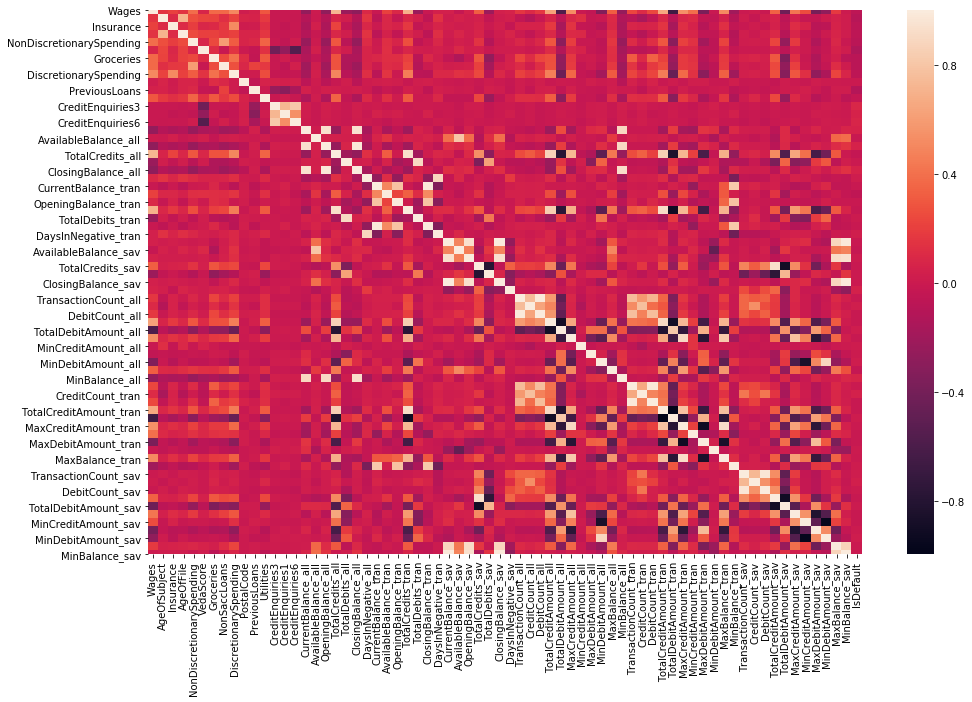

In [7]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=False)
plt.show()

Wages  AgeOfSubject  Gender  Insurance  AgeOfFile  \
Null Count      0             0       0          0          0   

            NonDiscretionarySpending  VedaScore  Groceries  NonSaccLoans  \
Null Count                         0          0          0             0   

            DiscretionarySpending  PostalCode  PreviousLoans  MaritalStatus  \
Null Count                      0           0            142             10   

            EmploymentSector  Utilities  EmploymentStatus  Dependants  \
Null Count                 1          0                 1          10   

            EmploymentLength  CreditEnquiries3  CreditEnquiries1  \
Null Count                 1                 0                 0   

            CreditEnquiries6  EmploymentPayFrequency  CurrentBalance_all  \
Null Count                 0                       0                  62   

            AvailableBalance_all  OpeningBalance_all  TotalCredits_all  \
Null Count                    62                  62                62   

            TotalDebits_all  ClosingBalance_all  DaysInNegative_all  \
Null Count               62                  62                  62   

            CurrentBalance_tran  AvailableBalance_tran  OpeningBalance_tran  \
Null Count                  269                    269                  269   

            TotalCredits_tran  TotalDebits_tran  ClosingBalance_tran  \
Null Count                269               269                  269   

            DaysInNegative_tran  CurrentBalance_sav  AvailableBalance_sav  \
Null Count                  269                 536                   536   

            OpeningBalance_sav  TotalCredits_sav  TotalDebits_sav  \
Null Count                 536               536              536   

            ClosingBalance_sav  DaysInNegative_sav  TransactionCount_all  \
Null Count                 536                 536                    62   

            CreditCount_all  DebitCount_all  TotalCreditAmount_all  \
Null Count               62              62                     62   

            TotalDebitAmount_all  MaxCreditAmount_all  MinCreditAmount_all  \
Null Count                    62                   62                   62   

            MaxDebitAmount_all  MinDebitAmount_all  MaxBalance_all  \
Null Count                  62                  62              62   

            MinBalance_all  TransactionCount_tran  CreditCount_tran  \
Null Count              62                    281               281   

            DebitCount_tran  TotalCreditAmount_tran  TotalDebitAmount_tran  \
Null Count              281                     281                    281   

            MaxCreditAmount_tran  MinCreditAmount_tran  MaxDebitAmount_tran  \
Null Count                   281                   281                  281   

            MinDebitAmount_tran  MaxBalance_tran  MinBalance_tran  \
Null Count                  281              281              281   

            TransactionCount_sav  CreditCount_sav  DebitCount_sav  \
Null Count                   696              696             696   

            TotalCreditAmount_sav  TotalDebitAmount_sav  MaxCreditAmount_sav  \
Null Count                    696                   696                  696   

            MinCreditAmount_sav  MaxDebitAmount_sav  MinDebitAmount_sav  \
Null Count                  696                 696                 696   

            MaxBalance_sav  MinBalance_sav  IsDefault  
Null Count             696             696          0

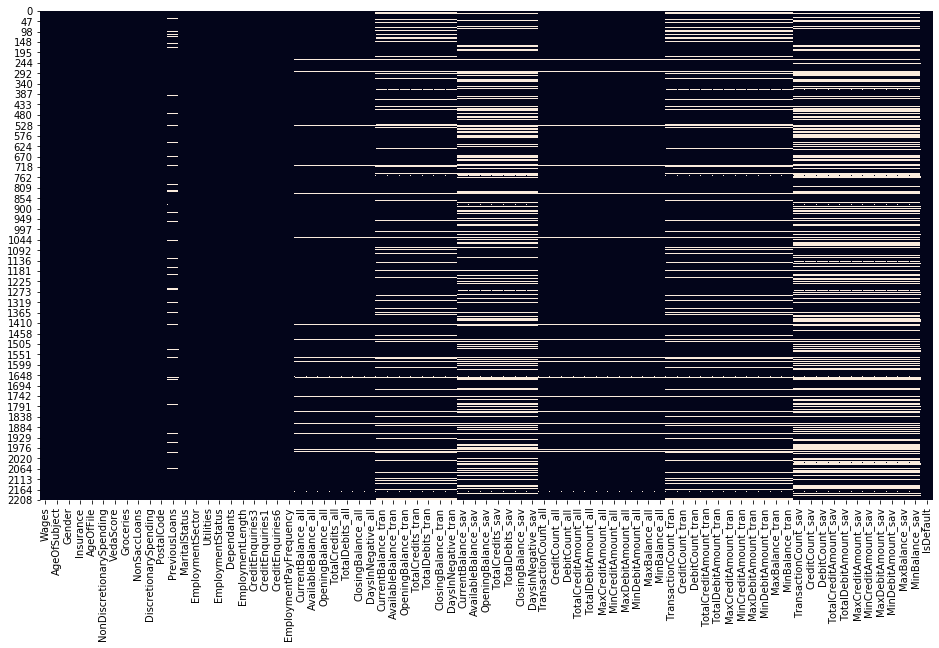

In [8]:
#Checking number of null values in each column
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull(), cbar=False)
df.isna().sum().to_frame(name="Null Count").T

### Removing columns with more than 50% of null values (if any)

In [9]:
#count half point of the dataset.
half_point = len(df) / 2
df = df.dropna(thresh=half_point, axis=1)
print ("New shape = ",df.shape)

New shape =  (2008, 77)


### Removing Duplicate values (if any)

In [10]:
df.drop_duplicates()
print ("New shape = ",df.shape)

New shape =  (2008, 77)


### Missing Value Imputation


*****
Numerical column imputation with mean
*****


*****
Categorical column imputation with mode
*****

Missing value imputation done.


Wages  AgeOfSubject  Gender  Insurance  AgeOfFile  \
Null Count      0             0       0          0          0   

            NonDiscretionarySpending  VedaScore  Groceries  NonSaccLoans  \
Null Count                         0          0          0             0   

            DiscretionarySpending  PostalCode  PreviousLoans  MaritalStatus  \
Null Count                      0           0              0              0   

            EmploymentSector  Utilities  EmploymentStatus  Dependants  \
Null Count                 0          0                 0           0   

            EmploymentLength  CreditEnquiries3  CreditEnquiries1  \
Null Count                 0                 0                 0   

            CreditEnquiries6  EmploymentPayFrequency  CurrentBalance_all  \
Null Count                 0                       0                   0   

            AvailableBalance_all  OpeningBalance_all  TotalCredits_all  \
Null Count                     0                   0                 0   

            TotalDebits_all  ClosingBalance_all  DaysInNegative_all  \
Null Count                0                   0                   0   

            CurrentBalance_tran  AvailableBalance_tran  OpeningBalance_tran  \
Null Count                    0                      0                    0   

            TotalCredits_tran  TotalDebits_tran  ClosingBalance_tran  \
Null Count                  0                 0                    0   

            DaysInNegative_tran  CurrentBalance_sav  AvailableBalance_sav  \
Null Count                    0                   0                     0   

            OpeningBalance_sav  TotalCredits_sav  TotalDebits_sav  \
Null Count                   0                 0                0   

            ClosingBalance_sav  DaysInNegative_sav  TransactionCount_all  \
Null Count                   0                   0                     0   

            CreditCount_all  DebitCount_all  TotalCreditAmount_all  \
Null Count                0               0                      0   

            TotalDebitAmount_all  MaxCreditAmount_all  MinCreditAmount_all  \
Null Count                     0                    0                    0   

            MaxDebitAmount_all  MinDebitAmount_all  MaxBalance_all  \
Null Count                   0                   0               0   

            MinBalance_all  TransactionCount_tran  CreditCount_tran  \
Null Count               0                      0                 0   

            DebitCount_tran  TotalCreditAmount_tran  TotalDebitAmount_tran  \
Null Count                0                       0                      0   

            MaxCreditAmount_tran  MinCreditAmount_tran  MaxDebitAmount_tran  \
Null Count                     0                     0                    0   

            MinDebitAmount_tran  MaxBalance_tran  MinBalance_tran  \
Null Count                    0                0                0   

            TransactionCount_sav  CreditCount_sav  DebitCount_sav  \
Null Count                     0                0               0   

            TotalCreditAmount_sav  TotalDebitAmount_sav  MaxCreditAmount_sav  \
Null Count                      0                     0                    0   

            MinCreditAmount_sav  MaxDebitAmount_sav  MinDebitAmount_sav  \
Null Count                    0                   0                   0   

            MaxBalance_sav  MinBalance_sav  IsDefault  
Null Count               0               0          0

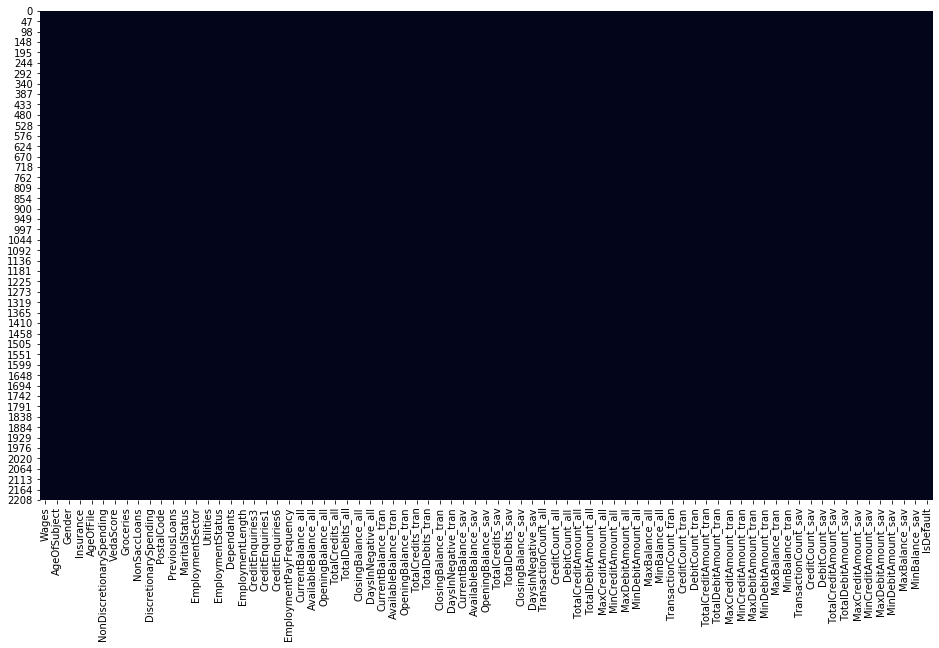

In [11]:
print("\n*****")
print("Numerical column imputation with mean")
print("*****\n")
for col in numerical_columns:
    #print('Imputation with Median: %s' % (col))
    df[col].fillna(df[col].mean(), inplace=True)

print("\n*****")
print("Categorical column imputation with mode")
print("*****\n")
    
for col in categorical_columns[:-1]:
    #print('Imputation with Mode: %s' % (col))
    df[col].fillna(df[col].mode()[0], inplace=True)

print('Missing value imputation done.')

plt.figure(figsize=(16,9))
sns.heatmap(df.isnull(), cbar=False)
df.isna().sum().to_frame(name="Null Count").T

All the null vaues have been imputed now. Hence, our dataset is having no null values now.

### Target class distribution

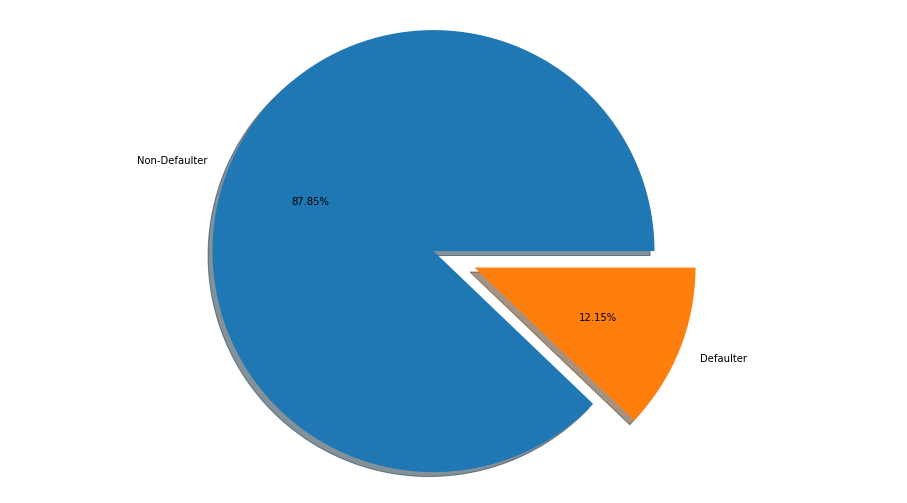

In [12]:
# plot pie chart
plt.figure(figsize=(16,9))
explode = (0.2, 0)  # only "explode" the 1st slice.
labels = ["Non-Defaulter", "Defaulter"]
sizes = df["IsDefault"].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, explode=explode)
plt.axis('equal')
plt.show()

Imbalance can be seen in target class distribution. I'll be implementing SMOTE sampling technique later to reove this imbalance.

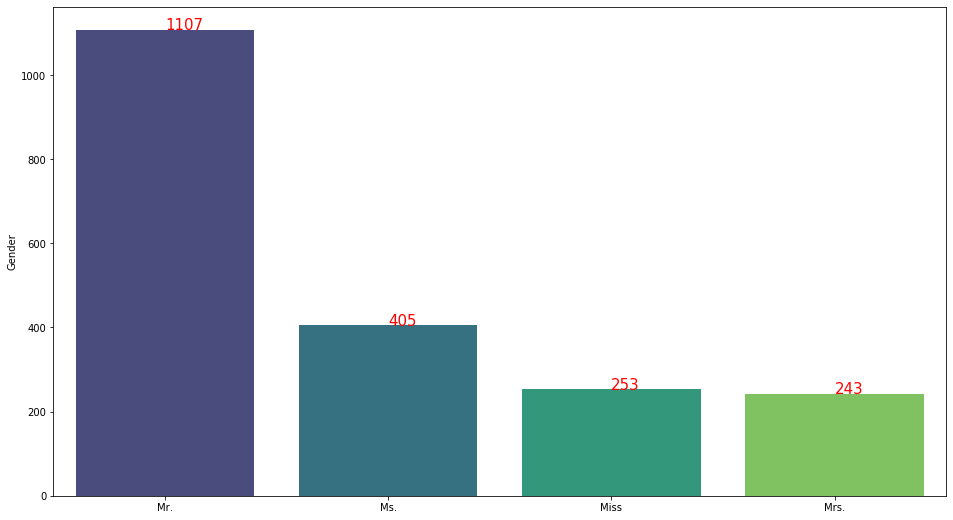

In [13]:
plt.figure(figsize=(16,9))
ax = sns.barplot(x=df["Gender"].unique(), y=df["Gender"].value_counts(), data=df, palette='viridis')
for i, v in df["Gender"].value_counts().reset_index().iterrows():
    ax.text(i, v.Gender, v.Gender, color='red',fontsize=15)

**Note**: Some data inconsistency can be seen here. "Miss." and "Ms." are the same thing but have been assigned two distinct categories.

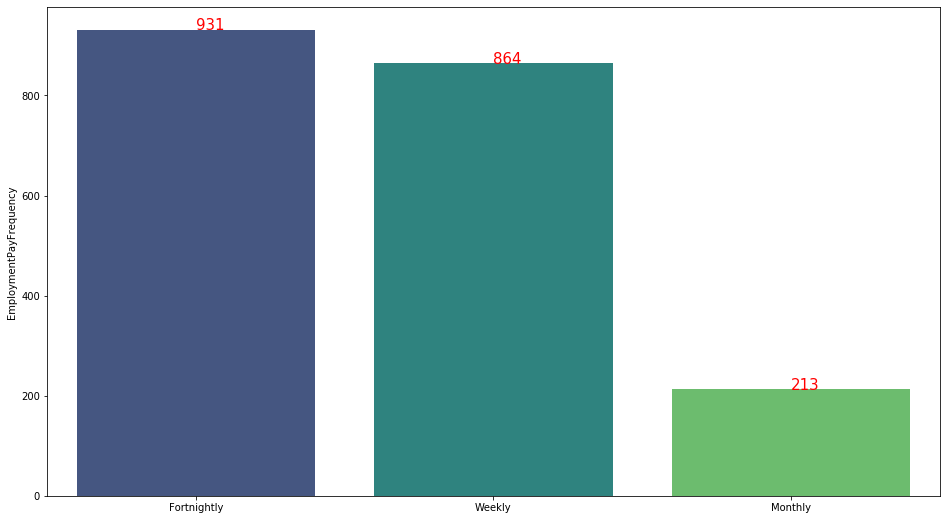

In [14]:
plt.figure(figsize=(16,9))
ax = sns.barplot(x=df["EmploymentPayFrequency"].unique(), y=df["EmploymentPayFrequency"].value_counts(), data=df, palette='viridis')
for i, v in df["EmploymentPayFrequency"].value_counts().reset_index().iterrows():
    ax.text(i, v.EmploymentPayFrequency, v.EmploymentPayFrequency, color='red',fontsize=15)

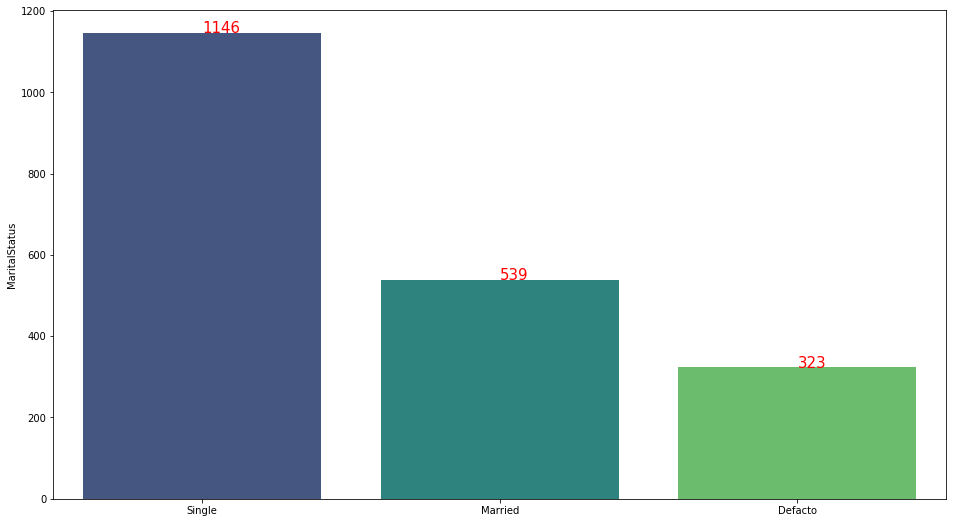

In [15]:
plt.figure(figsize=(16,9))
ax = sns.barplot(x=df["MaritalStatus"].unique(), y=df["MaritalStatus"].value_counts(), data=df, palette='viridis')
for i, v in df["MaritalStatus"].value_counts().reset_index().iterrows():
    ax.text(i, v.MaritalStatus, v.MaritalStatus, color='red',fontsize=15)

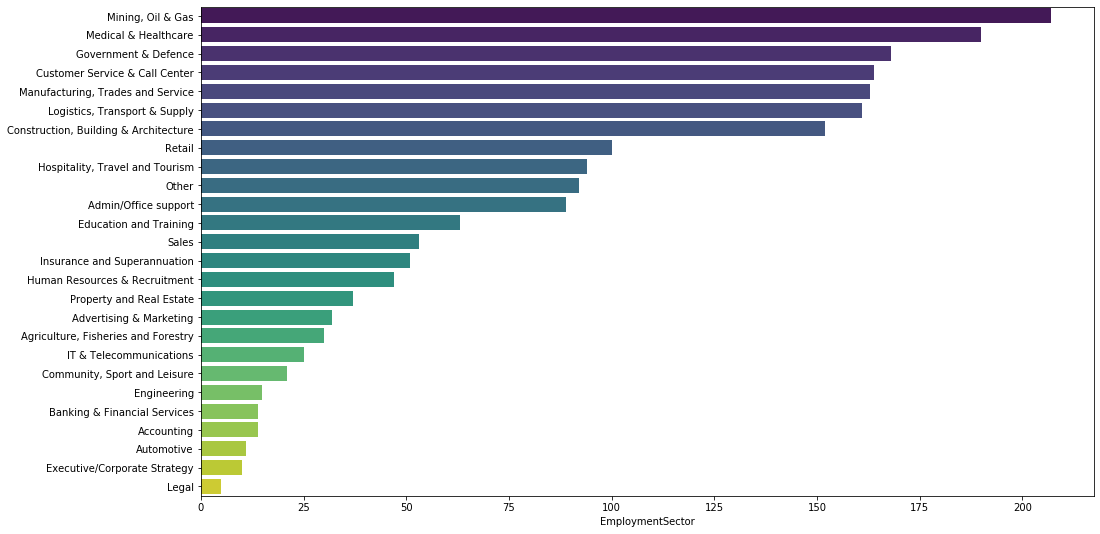

In [16]:
plt.figure(figsize=(16,9))
ax = sns.barplot(x=df["EmploymentSector"].value_counts(), y=df["EmploymentSector"].unique(), data=df, palette='viridis')

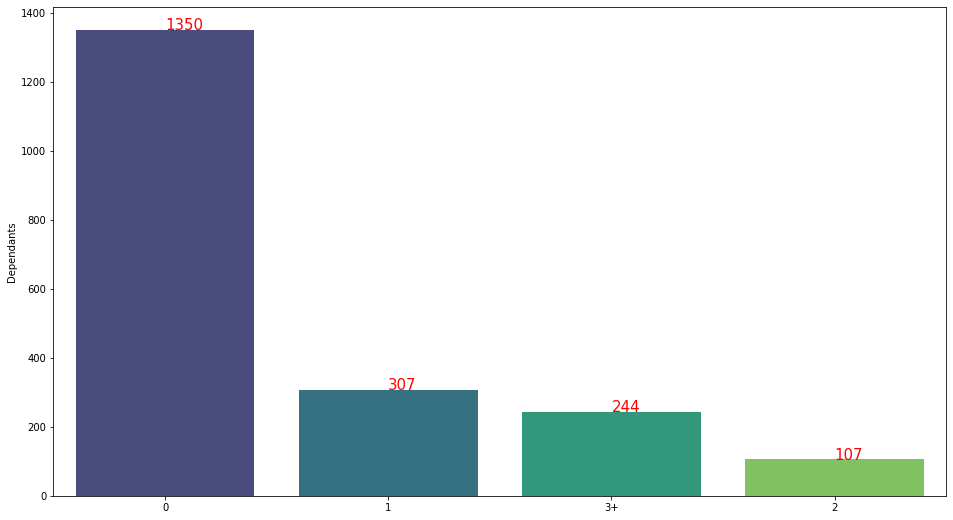

In [17]:
plt.figure(figsize=(16,9))
ax = sns.barplot(x=df["Dependants"].unique(), y=df["Dependants"].value_counts(), data=df, palette='viridis')
for i, v in df["Dependants"].value_counts().reset_index().iterrows():
    ax.text(i, v.Dependants, v.Dependants, color='red',fontsize=15)

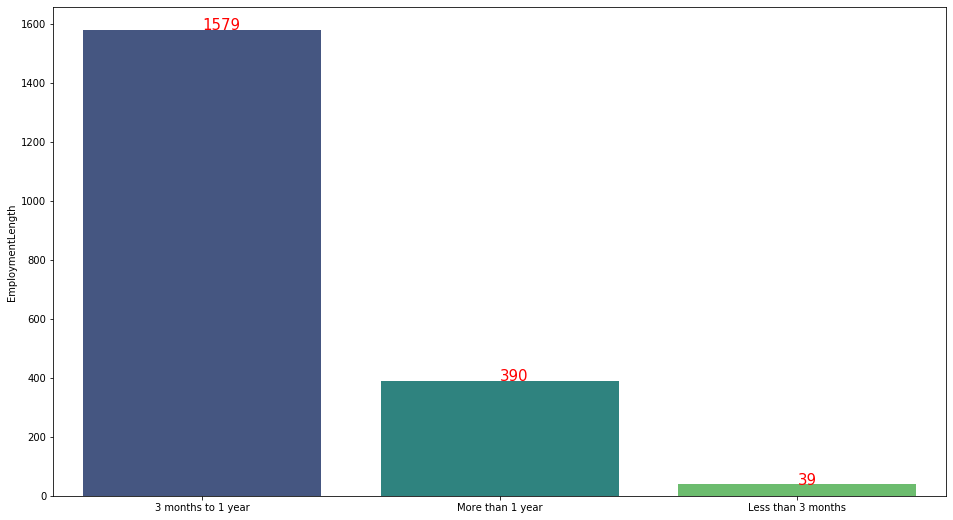

In [18]:
plt.figure(figsize=(16,9))
ax = sns.barplot(x=df["EmploymentLength"].unique(), y=df["EmploymentLength"].value_counts(), data=df, palette='viridis')
for i, v in df["EmploymentLength"].value_counts().reset_index().iterrows():
    ax.text(i, v.EmploymentLength, v.EmploymentLength, color='red',fontsize=15)

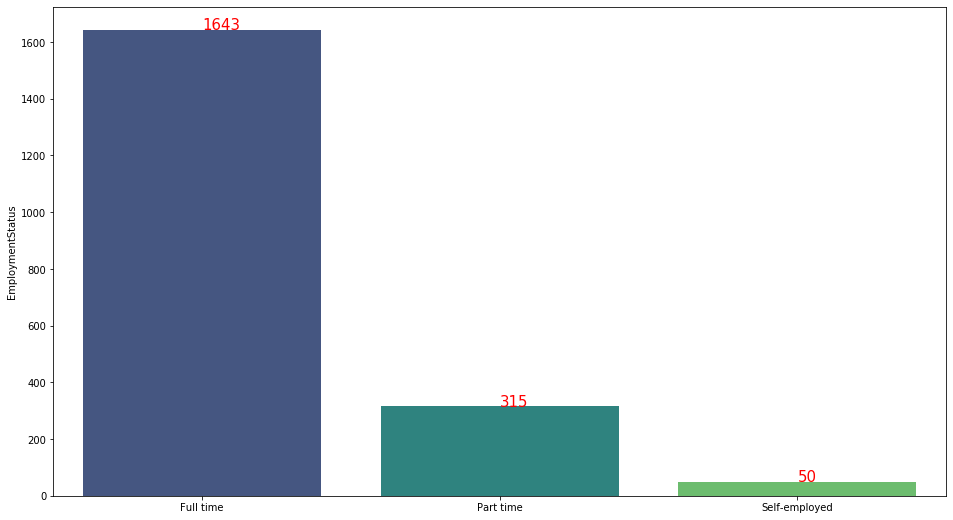

In [19]:
plt.figure(figsize=(16,9))
ax = sns.barplot(x=df["EmploymentStatus"].unique(), y=df["EmploymentStatus"].value_counts(), data=df, palette='viridis')
for i, v in df["EmploymentStatus"].value_counts().reset_index().iterrows():
    ax.text(i, v.EmploymentStatus, v.EmploymentStatus, color='red',fontsize=15)

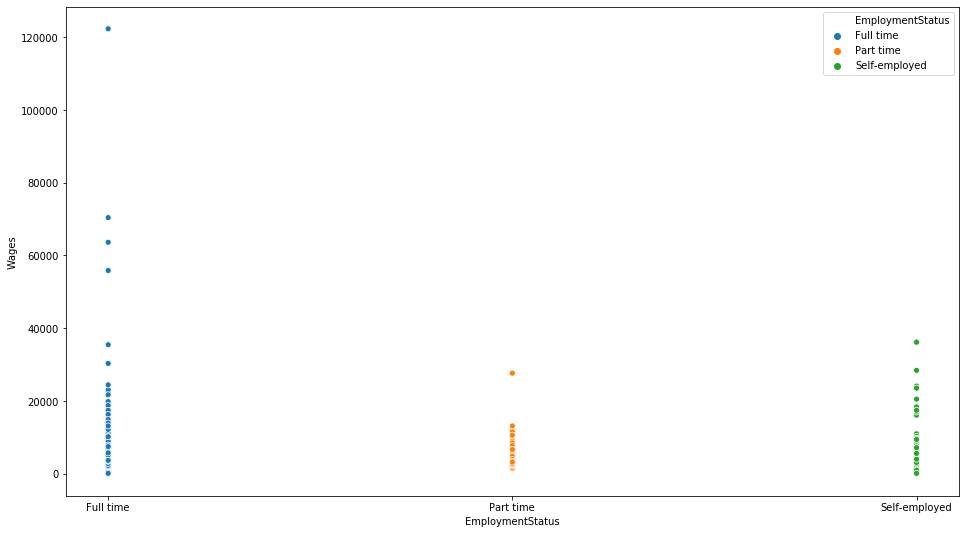

In [20]:
plt.figure(figsize=(16,9))
sns.scatterplot(x="EmploymentStatus",y="Wages",data=df, hue="EmploymentStatus")

## Handling Outliers

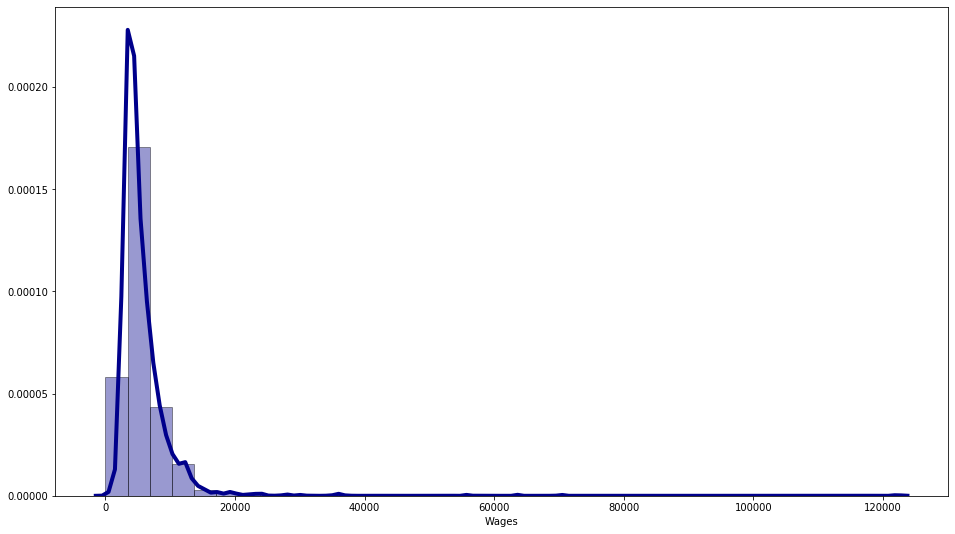

Wages  AgeOfSubject  Insurance  AgeOfFile  \
Skewness Value 11.225         0.747     11.549      0.978   

                NonDiscretionarySpending  VedaScore  Groceries  NonSaccLoans  \
Skewness Value                     6.927      0.365      2.738         2.883   

                DiscretionarySpending  PostalCode  PreviousLoans  Utilities  \
Skewness Value                  4.866       0.666          1.515      5.721   

                CreditEnquiries3  CreditEnquiries1  CreditEnquiries6  \
Skewness Value             1.926             1.563             1.990   

                CurrentBalance_all  AvailableBalance_all  OpeningBalance_all  \
Skewness Value              -5.130               -32.624              -5.362   

                TotalCredits_all  TotalDebits_all  ClosingBalance_all  \
Skewness Value             9.925            0.499              -5.239   

                DaysInNegative_all  CurrentBalance_tran  \
Skewness Value               3.676               -5.045   

                AvailableBalance_tran  OpeningBalance_tran  TotalCredits_tran  \
Skewness Value                 14.273               -5.562             11.805   

                TotalDebits_tran  ClosingBalance_tran  DaysInNegative_tran  \
Skewness Value            -2.041               -4.858                4.440   

                CurrentBalance_sav  AvailableBalance_sav  OpeningBalance_sav  \
Skewness Value             -25.899                22.659             -22.089   

                TotalCredits_sav  TotalDebits_sav  ClosingBalance_sav  \
Skewness Value            14.691          -10.828             -25.849   

                DaysInNegative_sav  TransactionCount_all  CreditCount_all  \
Skewness Value               6.938                11.984            5.221   

                DebitCount_all  TotalCreditAmount_all  TotalDebitAmount_all  \
Skewness Value          14.375                  8.775                -8.994   

                MaxCreditAmount_all  MinCreditAmount_all  MaxDebitAmount_all  \
Skewness Value               12.193                8.839             -35.378   

                MinDebitAmount_all  MaxBalance_all  MinBalance_all  \
Skewness Value             -33.718          14.267          -4.596   

                TransactionCount_tran  CreditCount_tran  DebitCount_tran  \
Skewness Value                  2.746             3.339            2.951   

                TotalCreditAmount_tran  TotalDebitAmount_tran  \
Skewness Value                  10.457                -10.356   

                MaxCreditAmount_tran  MinCreditAmount_tran  \
Skewness Value                12.740                21.893   

                MaxDebitAmount_tran  MinDebitAmount_tran  MaxBalance_tran  \
Skewness Value              -14.427              -19.917           11.078   

                MinBalance_tran  TransactionCount_sav  CreditCount_sav  \
Skewness Value          -11.225                 7.511           13.735   

                DebitCount_sav  TotalCreditAmount_sav  TotalDebitAmount_sav  \
Skewness Value           5.953                 12.522               -11.549   

                MaxCreditAmount_sav  MinCreditAmount_sav  MaxDebitAmount_sav  \
Skewness Value               12.919               29.214             -12.937   

                MinDebitAmount_sav  MaxBalance_sav  MinBalance_sav  IsDefault  
Skewness Value             -29.185         -15.731         -27.045      2.319

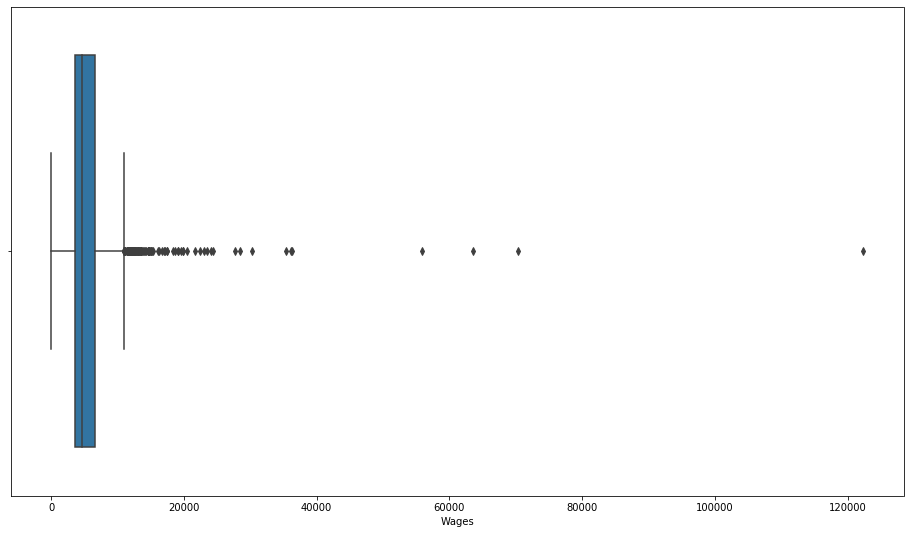

In [21]:
plt.figure(figsize=(16,9))
sns.distplot(df["Wages"], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.show()
plt.figure(figsize=(16,9))
sns.boxplot(x=df["Wages"]) #Box pl0t
df.skew().to_frame(name="Skewness Value").T #This will tell us the magnitude and direction of skewness.

If we look at the skewness value of the variables, most of the variables are either right skewed or left skewed because of outliers present in the dataset. For example, if we look at the distribution curve of Wages, it is right skewed due to some high magnitude values present on the right side of the curve. It can aslo be seen from the box plot of Wages variable.
There are several techniques which can be used to remove the outliers. Some of them are listed below:

1. Removal of outliers based on z-score threshold
2. Removal of outliers based on Inter Quartile Range score
3. Quantile based trimming
4. Quantile based flooring and capping
5. Log Transformation of outliers
6. Replacing outliers with median

The first three methods can't be used due to small number of samples in our dataset. Using these methods will further reduce our dataset size. As shown in below cell,  IQR score has been used to remove outliers which removes everything outside the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) and thus reducing our dataset to 286 samples only. Hence, outliers removal is not a suitable approach considering the sample size.

In [22]:
#Removal of outliers based on Inter Quartile Range score
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Shape after outliers removal: ",df_out.shape)

Shape after outliers removal:  (290, 77)


Replacing outliers with median would alter the information in our dataset. Hence, I decided to use log transformation to minimixe the skewness in our dataset without dropping any samples.

Wages  AgeOfSubject  Insurance  AgeOfFile  \
Skewness value -0.964         0.158     -0.108     -1.703   

                NonDiscretionarySpending  VedaScore  Groceries  NonSaccLoans  \
Skewness value                    -3.622     -0.350     -1.799        -1.076   

                DiscretionarySpending  PostalCode  PreviousLoans  Utilities  \
Skewness value                  0.163      -0.296          0.687      0.181   

                CreditEnquiries3  CreditEnquiries1  CreditEnquiries6  \
Skewness value             0.693             1.292             0.290   

                CurrentBalance_all  AvailableBalance_all  OpeningBalance_all  \
Skewness value               0.715                -0.790               0.419   

                TotalCredits_all  TotalDebits_all  ClosingBalance_all  \
Skewness value             0.775            0.845               0.588   

                DaysInNegative_all  CurrentBalance_tran  \
Skewness value               0.304               -0.436   

                AvailableBalance_tran  OpeningBalance_tran  TotalCredits_tran  \
Skewness value                 -0.647               -0.790             -6.579   

                TotalDebits_tran  ClosingBalance_tran  DaysInNegative_tran  \
Skewness value             0.860               -0.516                0.182   

                CurrentBalance_sav  AvailableBalance_sav  OpeningBalance_sav  \
Skewness value              -0.399                -0.397              -0.597   

                TotalCredits_sav  TotalDebits_sav  ClosingBalance_sav  \
Skewness value            -1.803            1.664              -0.421   

                DaysInNegative_sav  TransactionCount_all  CreditCount_all  \
Skewness value               2.408                 0.262            0.026   

                DebitCount_all  TotalCreditAmount_all  TotalDebitAmount_all  \
Skewness value           0.184                  0.744                 0.000   

                MaxCreditAmount_all  MinCreditAmount_all  MaxDebitAmount_all  \
Skewness value                0.913                0.470               0.000   

                MinDebitAmount_all  MaxBalance_all  MinBalance_all  \
Skewness value               0.000           0.281           4.164   

                TransactionCount_tran  CreditCount_tran  DebitCount_tran  \
Skewness value                 -0.960            -0.249           -1.192   

                TotalCreditAmount_tran  TotalDebitAmount_tran  \
Skewness value                  -0.058                  0.000   

                MaxCreditAmount_tran  MinCreditAmount_tran  \
Skewness value                 0.526                -0.710   

                MaxDebitAmount_tran  MinDebitAmount_tran  MaxBalance_tran  \
Skewness value                0.000                0.000           -3.433   

                MinBalance_tran  TransactionCount_sav  CreditCount_sav  \
Skewness value            2.536                -0.930           -0.789   

                DebitCount_sav  TotalCreditAmount_sav  TotalDebitAmount_sav  \
Skewness value          -0.792                 -3.067                 0.000   

                MaxCreditAmount_sav  MinCreditAmount_sav  MaxDebitAmount_sav  \
Skewness value               -3.247               -0.196               0.000   

                MinDebitAmount_sav  MaxBalance_sav  MinBalance_sav  IsDefault  
Skewness value               0.000          -2.782           0.142      2.319

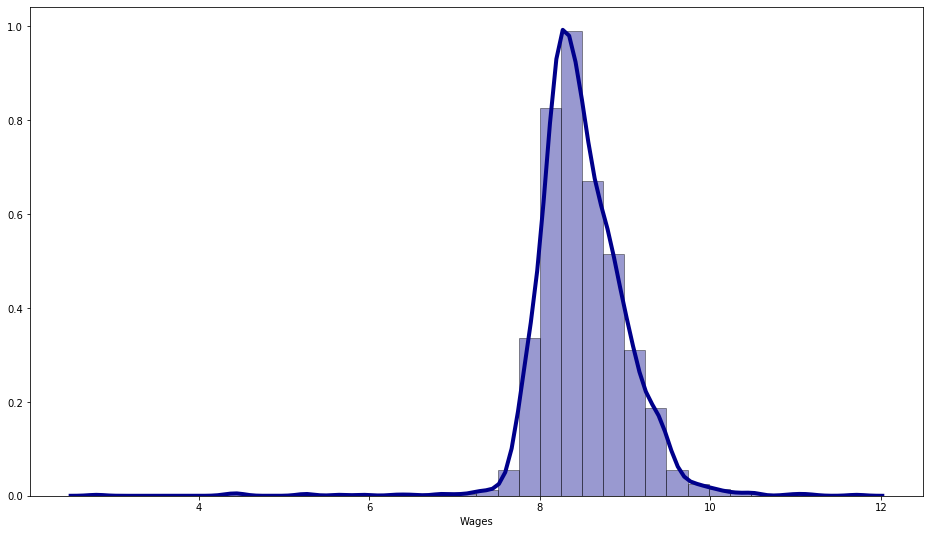

In [23]:
# print (df["IsDefault"].unique())
for each_col in numerical_columns:
    df[each_col] = df[each_col].map(lambda i: np.log(i) if i > 0 else 0) 
plt.figure(figsize=(16,9))
sns.distplot(df["Wages"], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
df.skew().to_frame(name="Skewness value").T

This log transformation does not affect the smaller values but reduces the larger values in the dataset and thus we get a curve close to normal distribution.

## Data Cleansing

### Replacing values

In [24]:
df["Gender"].replace(to_replace="Miss",value="Ms.",inplace=True)
df.drop("PostalCode",axis=1,inplace=True)
list(df["Gender"].unique())

['Mr.', 'Ms.', 'Mrs.']

### Transforming Categorical variables using One-Hot Encoding

In [25]:
print ("Shape before transforming = ",df.shape)
df = pd.get_dummies(df,columns=["Gender"],drop_first=True)
df = pd.get_dummies(df,columns=["EmploymentPayFrequency"],drop_first=True)
df = pd.get_dummies(df,columns=["Dependants"],drop_first=True)
df = pd.get_dummies(df,columns=["MaritalStatus"],drop_first=True)
df = pd.get_dummies(df,columns=["EmploymentSector"],drop_first=True)
df = pd.get_dummies(df,columns=["EmploymentStatus"],drop_first=True)
df = pd.get_dummies(df,columns=["EmploymentLength"],drop_first=True)
print ("Shape after transforming = ",df.shape)
df.head()

Shape before transforming =  (2008, 76)
Shape after transforming =  (2008, 107)


Wages  AgeOfSubject  Insurance  AgeOfFile  NonDiscretionarySpending  \
0  8.514         6.403      3.342      5.408                     6.488   
1  8.241         6.407      0.000      4.425                     7.415   
2  8.645         6.592      0.000      3.648                     6.834   
3  8.380         5.786      0.000      2.749                     7.741   
4  8.932         6.199      4.068      5.529                     8.277   

   VedaScore  Groceries  NonSaccLoans  DiscretionarySpending  PreviousLoans  \
0      6.217      5.488         5.797                  6.118          0.000   
1      6.248      6.587         6.328                  7.012          0.000   
2      6.468      5.982         6.563                  7.104          0.000   
3      6.194      5.649         6.079                  7.341          0.000   
4      6.159      6.212         7.712                  7.409          0.000   

   Utilities  CreditEnquiries3  CreditEnquiries1  CreditEnquiries6  \
0      0.000             1.099             1.099             1.792   
1      5.734             1.099             0.693             1.386   
2      0.000             0.693             0.000             0.693   
3      5.252             0.000             0.000             0.000   
4      4.076             0.693             0.693             0.693   

   CurrentBalance_all  AvailableBalance_all  OpeningBalance_all  \
0               0.000                -3.124               0.000   
1               0.000                -1.291               0.000   
2               0.000                 6.923               0.000   
3               5.213                 5.213               4.622   
4               0.000                 6.619               0.000   

   TotalCredits_all  TotalDebits_all  ClosingBalance_all  DaysInNegative_all  \
0            10.065            0.000               0.000               3.135   
1            10.242            0.000               0.000               4.682   
2            10.197           10.216               0.000               4.595   
3            10.229            0.000               5.213               3.091   
4            11.199           11.137               0.000               3.178   

   CurrentBalance_tran  AvailableBalance_tran  OpeningBalance_tran  \
0                4.492                  6.644                6.269   
1                0.000                  0.000                0.000   
2                0.000                  6.281                0.000   
3                4.056                  4.056                1.959   
4                6.648                  0.000                0.000   

   TotalCredits_tran  TotalDebits_tran  ClosingBalance_tran  \
0             10.299             0.000                4.814   
1              7.159             0.000                0.000   
2             10.103            10.085                0.000   
3              9.985             0.000                4.056   
4             10.780            10.764                6.648   

   DaysInNegative_tran  CurrentBalance_sav  AvailableBalance_sav  \
0                3.154               0.000                -3.124   
1                4.522               0.000                -1.291   
2                4.595               5.397                 5.397   
3                3.091               4.835                 4.835   
4                3.178               6.619                 6.619   

   OpeningBalance_sav  TotalCredits_sav  TotalDebits_sav  ClosingBalance_sav  \
0               7.155             9.889            0.000               0.000   
1               3.975            10.195            0.000               0.000   
2               7.052             7.340            7.814               5.397   
3               4.550             8.700            0.000               4.835   
4               0.200             9.933            9.896               6.619   

   DaysInNegative_sav  TransactionCount_all  CreditCount_all  DebitCount_all  \
0       

## Feature selection

There are a number of feature selection techniques that can used to slect the best features to train the model. Some of them are shown below.

**1. Remove features with low-variance**

Features which mostly remain at the same level across different observations, should not ideally be responsible for chaging the target class.

**2. Remove features which are not correlated with the response variable**

Eliminating uncorrelated variable based on pearson-coefficient value threshold.

**3. K-Best Fit**

Selecting top k features using sklearn SelectBest function.

**4. Recursive Feature Elimination**

Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached.

**5. Recursive Feature Elimination with Cross-Validation**

It is very similar to the last method but performs a cross-validation to estimate a better estimation of features.

**6. Prinicipal Component Analysis (PCA)**

It is not really a feature selection method but rather a decomposition method.

I am going to try these one by one and will train all the following models with selected features.

In [26]:
X,y = df.drop("IsDefault",axis=1,inplace=False),df["IsDefault"]

###1. Remove features with low-variance
# var = VarianceThreshold(threshold=0.3)
# var = var.fit(X,y)
# cols = var.get_support(indices=True)
# features = list(X.columns[cols])
# df = df[features]
# df.shape

###2. Remove features which are not correlated with the response variable
# cor_target = abs(df.corr()["IsDefault"])
# features = cor_target[cor_target>0.1]
# df = df[features.index]
# df.shape

###3. K-Best Fit
# KBest = SelectKBest(score_func = chi2, k = 25)
# columns = X.columns
# Z = preprocessing.MinMaxScaler().fit_transform(X)
# KBest = KBest.fit(Z,y)
# cols = KBest.get_support(indices=True)
# print(cols)
# features = [ columns[i] for i in cols]
# df = df[features]
# df.shape

###4. Recursive Feature Elimination
# estimator = RandomForestClassifier(n_estimators=10, n_jobs=-1)
# rfe = RFE(estimator=estimator, n_features_to_select=50, step=1)
# RFeatures = rfe.fit(X, y)
# cols = rfe.get_support(indices=True)
# features = X.columns[cols]
# df = df[features]
# df.shape

###4. Recursive Feature Elimination with Cross-Validation
# print(df.shape)
# estimator = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state = 13)
# rfecv = RFECV(estimator, cv=5, n_jobs=-1, scoring='accuracy', min_features_to_select = 25)
# rfecv = rfecv.fit(X, y)
# cols = rfecv.get_support(indices=True)
# features = X.columns[cols]
# df = df[features]
# df.shape

###6. Prinicipal Component Analysis (PCA)
scaler = preprocessing.MinMaxScaler(feature_range=[0, 1])
X_rescaled = scaler.fit_transform(X)
pca = PCA()
pca = pca.fit(X_rescaled, y)
xp = list(range(len(np.cumsum(pca.explained_variance_ratio_))))
yp = np.cumsum(pca.explained_variance_ratio_)
n_components = np.interp(0.95, yp, xp) + 1
n_components = math.ceil(n_components)
pca = PCA(n_components=n_components)
pca = pca.fit(X, y)
feature_matrix = pd.DataFrame(pca.fit_transform(X))
X = feature_matrix
print (X.shape)

df["IsDefault"] = y
print(df.shape)
df.head()

(2008, 52)
(2008, 107)


Wages  AgeOfSubject  Insurance  AgeOfFile  NonDiscretionarySpending  \
0  8.514         6.403      3.342      5.408                     6.488   
1  8.241         6.407      0.000      4.425                     7.415   
2  8.645         6.592      0.000      3.648                     6.834   
3  8.380         5.786      0.000      2.749                     7.741   
4  8.932         6.199      4.068      5.529                     8.277   

   VedaScore  Groceries  NonSaccLoans  DiscretionarySpending  PreviousLoans  \
0      6.217      5.488         5.797                  6.118          0.000   
1      6.248      6.587         6.328                  7.012          0.000   
2      6.468      5.982         6.563                  7.104          0.000   
3      6.194      5.649         6.079                  7.341          0.000   
4      6.159      6.212         7.712                  7.409          0.000   

   Utilities  CreditEnquiries3  CreditEnquiries1  CreditEnquiries6  \
0      0.000             1.099             1.099             1.792   
1      5.734             1.099             0.693             1.386   
2      0.000             0.693             0.000             0.693   
3      5.252             0.000             0.000             0.000   
4      4.076             0.693             0.693             0.693   

   CurrentBalance_all  AvailableBalance_all  OpeningBalance_all  \
0               0.000                -3.124               0.000   
1               0.000                -1.291               0.000   
2               0.000                 6.923               0.000   
3               5.213                 5.213               4.622   
4               0.000                 6.619               0.000   

   TotalCredits_all  TotalDebits_all  ClosingBalance_all  DaysInNegative_all  \
0            10.065            0.000               0.000               3.135   
1            10.242            0.000               0.000               4.682   
2            10.197           10.216               0.000               4.595   
3            10.229            0.000               5.213               3.091   
4            11.199           11.137               0.000               3.178   

   CurrentBalance_tran  AvailableBalance_tran  OpeningBalance_tran  \
0                4.492                  6.644                6.269   
1                0.000                  0.000                0.000   
2                0.000                  6.281                0.000   
3                4.056                  4.056                1.959   
4                6.648                  0.000                0.000   

   TotalCredits_tran  TotalDebits_tran  ClosingBalance_tran  \
0             10.299             0.000                4.814   
1              7.159             0.000                0.000   
2             10.103            10.085                0.000   
3              9.985             0.000                4.056   
4             10.780            10.764                6.648   

   DaysInNegative_tran  CurrentBalance_sav  AvailableBalance_sav  \
0                3.154               0.000                -3.124   
1                4.522               0.000                -1.291   
2                4.595               5.397                 5.397   
3                3.091               4.835                 4.835   
4                3.178               6.619                 6.619   

   OpeningBalance_sav  TotalCredits_sav  TotalDebits_sav  ClosingBalance_sav  \
0               7.155             9.889            0.000               0.000   
1               3.975            10.195            0.000               0.000   
2               7.052             7.340            7.814               5.397   
3               4.550             8.700            0.000               4.835   
4               0.200             9.933            9.896               6.619   

   DaysInNegative_sav  TransactionCount_all  CreditCount_all  DebitCount_all  \
0       

### SMOTE (Synthetic Minority Oversampling Technique)

Before sampling : 
 0    1764
1     244
Name: IsDefault, dtype: int64
After sampling : 
 1    1764
0    1764
Name: IsDefault, dtype: int64


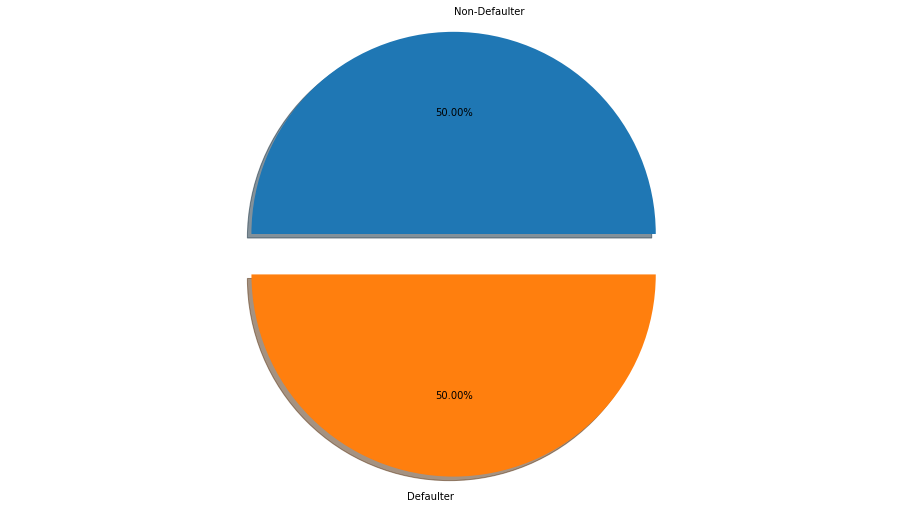

In [27]:
# X,y = df.drop("IsDefault",axis=1,inplace=False),df["IsDefault"]
print ("Before sampling : \n",y.value_counts())
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
print ("After sampling : \n",y.value_counts())

# plot pie chart
plt.figure(figsize=(16,9))
explode = (0.2, 0)  # only "explode" the 1st slice.
labels = ["Non-Defaulter", "Defaulter"]
sizes = y.value_counts()
plt.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, explode=explode)
plt.axis('equal')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
# X = preprocessing.StandardScaler().fit_transform(X.values)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
print (y_test.value_counts())

0    360
1    346
Name: IsDefault, dtype: int64


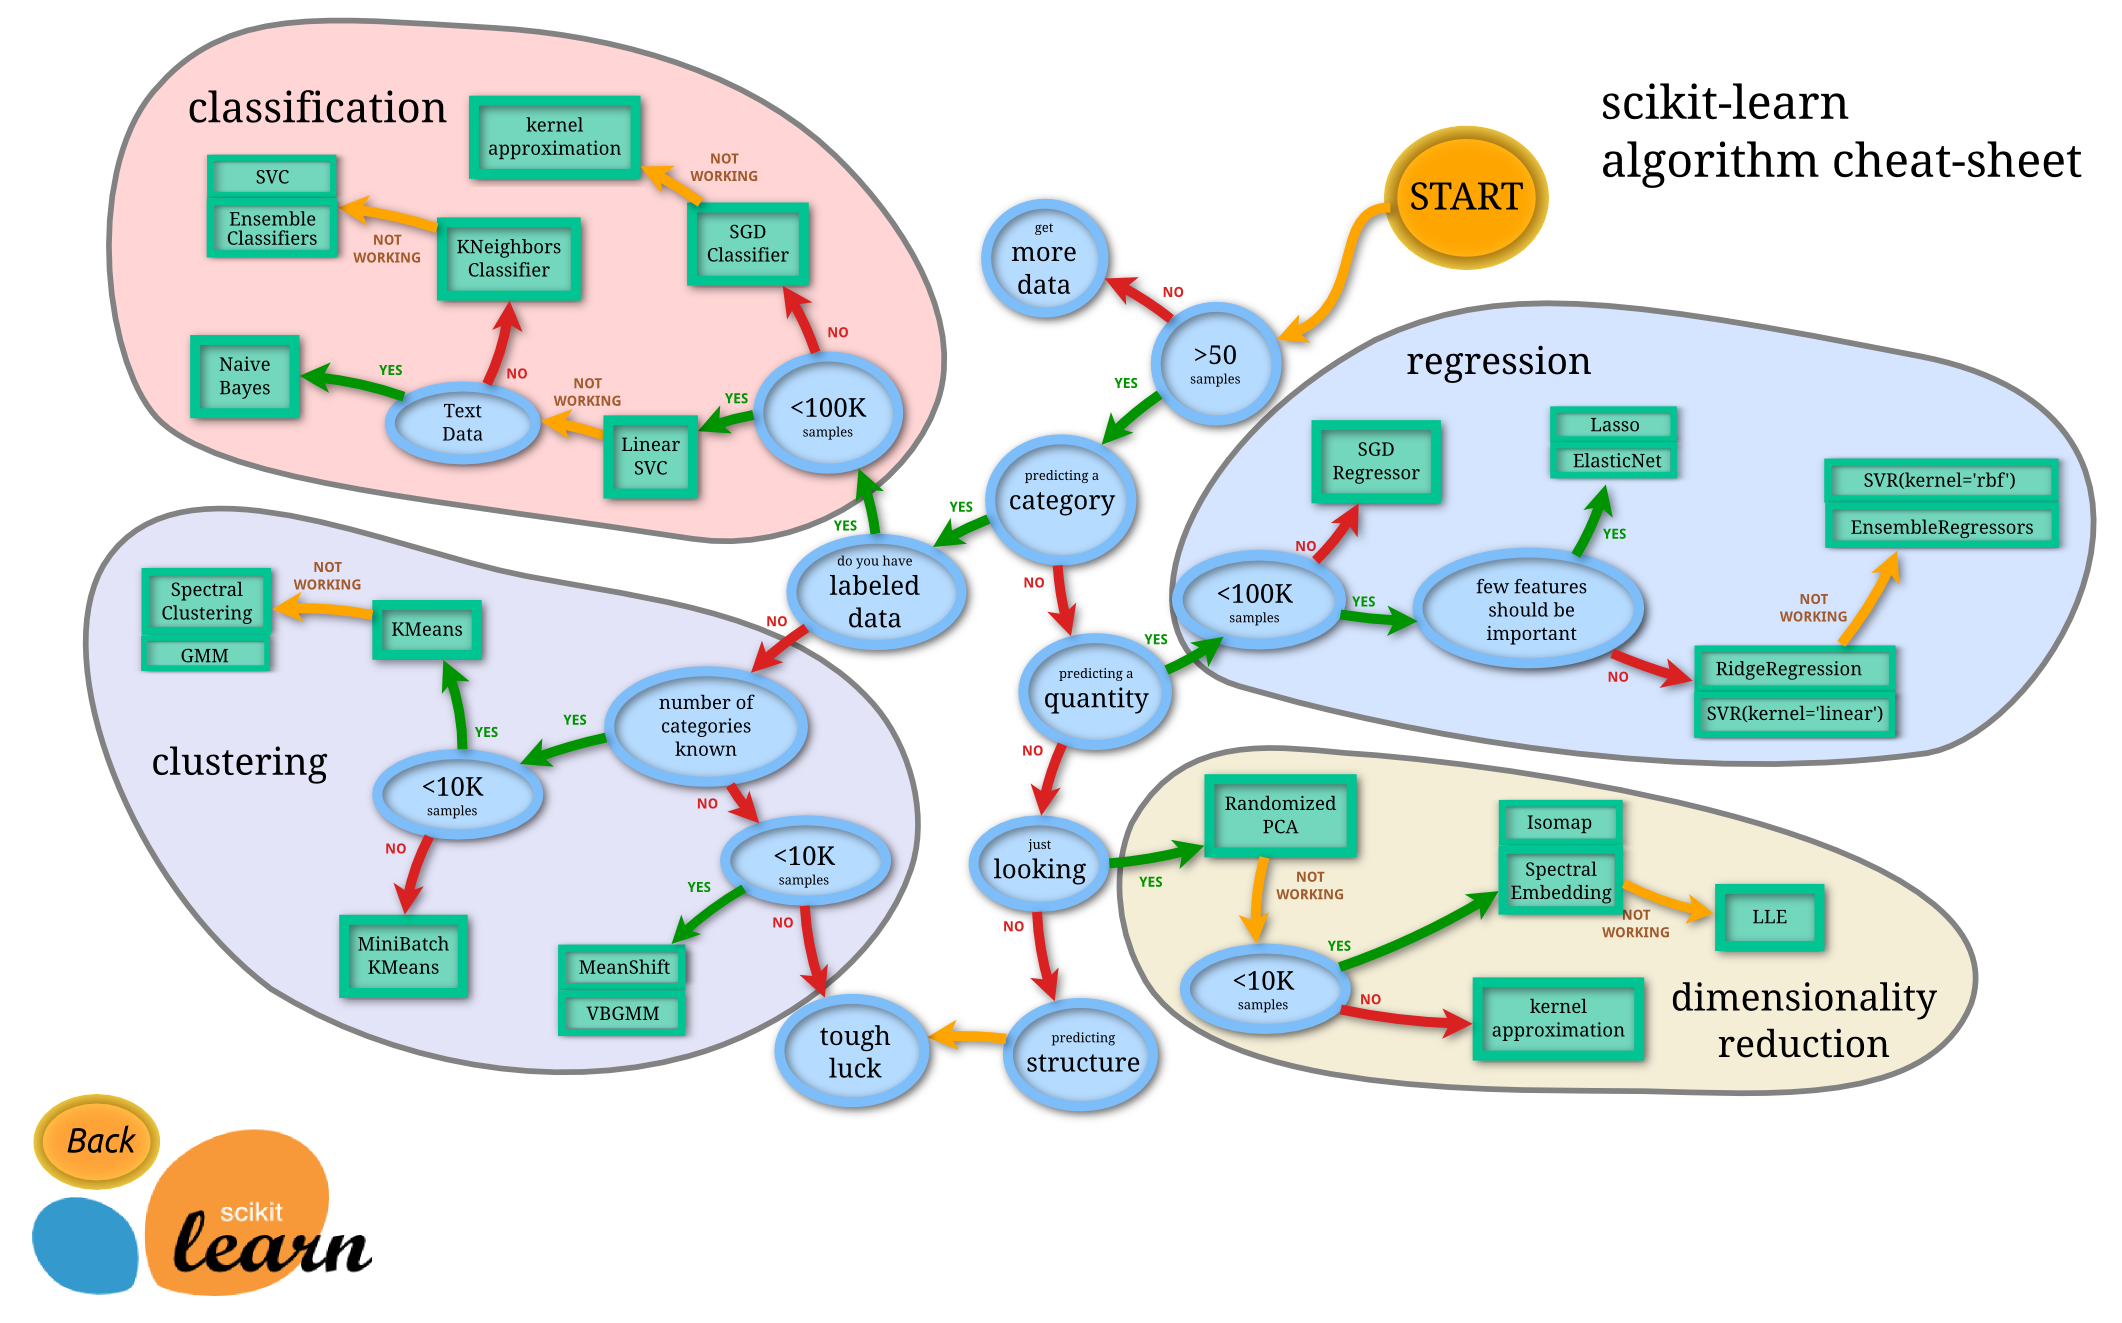

In [29]:
from IPython.display import Image, display;   
display(Image(filename='/Users/ankitkpr93/Downloads/scikit-learn.png'))

According to the chart provided by scikit-learn [[1]](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) and nature of our problem, I am first going to implement Linear SVC model. If that doesn't yield good results, then KNeighbours, SVC and other ensemble methods can be implemented.

Note: GridSearch algorithm can be used for each trained model to determine the best combination of model parameters. I have not included wide range of parameters in the parameter grid due to time constraint.

# Training

### Linear SVC

The best estimator is :  SVC(C=10, gamma=0.01, kernel='linear', probability=True)
Accuracy with best estimator :  0.7592067988668555
Linear SVM Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       360
           1       0.74      0.78      0.76       346

    accuracy                           0.76       706
   macro avg       0.76      0.76      0.76       706
weighted avg       0.76      0.76      0.76       706



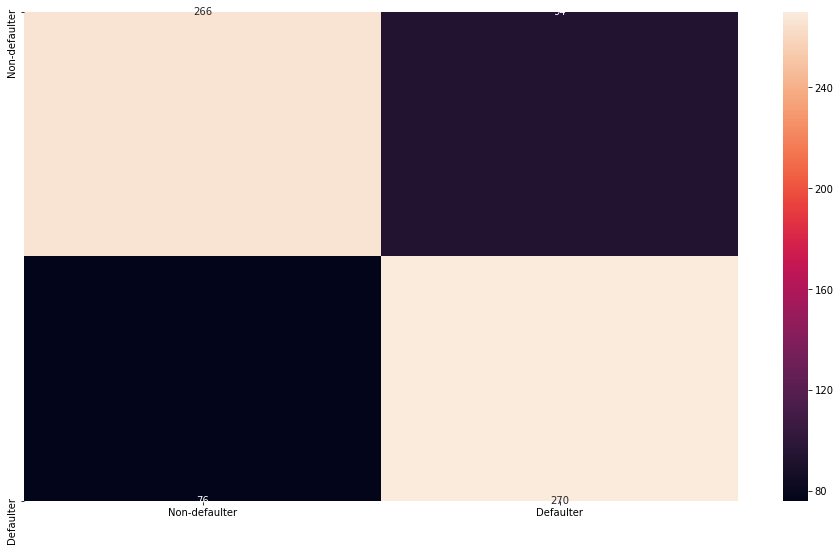

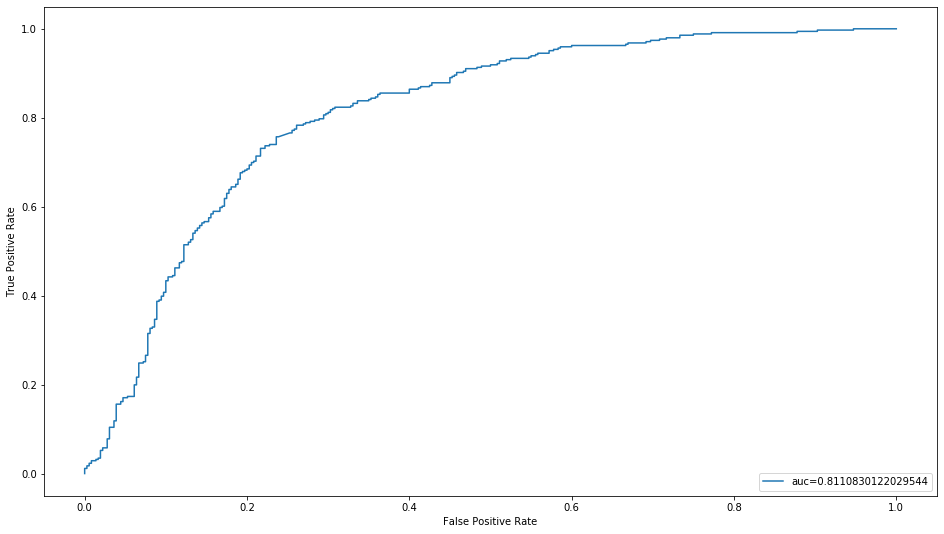

The average cross-validation score is 0.7296314054540006


In [30]:
#model tuning
param_grid = [
  {'C': [1,10], 'gamma':[0.01,0.001],'kernel': ['linear']}
    ]
model = svm.SVC(probability=True)
model_gs = GridSearchCV(model,param_grid,cv=2,n_jobs=-1)
model_gs.fit(X_train,y_train)
print("The best estimator is : ",model_gs.best_estimator_)

#Classification report
pred_cv = model_gs.best_estimator_.predict(X_test)
print ("Accuracy with best estimator : ",accuracy_score(y_test,pred_cv))
print("Linear SVM Classification Report: \n",classification_report(y_test, pred_cv, target_names=None))

#Confusion Matrix
plt.figure(figsize=(16,9))
akws = {"ha": 'center',"va": 'center'}
sns.heatmap(confusion_matrix(y_test, pred_cv),annot=True,fmt='2.5g',annot_kws=akws,\
            xticklabels=["Non-defaulter","Defaulter"],\
           yticklabels=["Non-defaulter","Defaulter"])
plt.show()

#ROC curve
probs = model_gs.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(16,9))
plt.plot(fpr, tpr, label="auc="+str(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#Cross Validation Score
cv_scores = cross_val_score(model_gs.best_estimator_,X,y,cv=25,n_jobs=-1)
print("The average cross-validation score is %s"%cv_scores.mean())

Although average cross validation score for Linear SVC is coming out out be 87% but the model is not able to classify defaulters successfully, as also evident by precision score of Defaulter class. 

According to the scikit chart shown above, I'll be implementing "KNeighbours" classifier now

### KNeighbors Classifier

The best estimator is :  KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3, weights='distance')

Accuracy with best estimator :  0.8257790368271954

KNeighbors Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.66      0.79       360
           1       0.74      1.00      0.85       346

    accuracy                           0.83       706
   macro avg       0.87      0.83      0.82       706
weighted avg       0.87      0.83      0.82       706



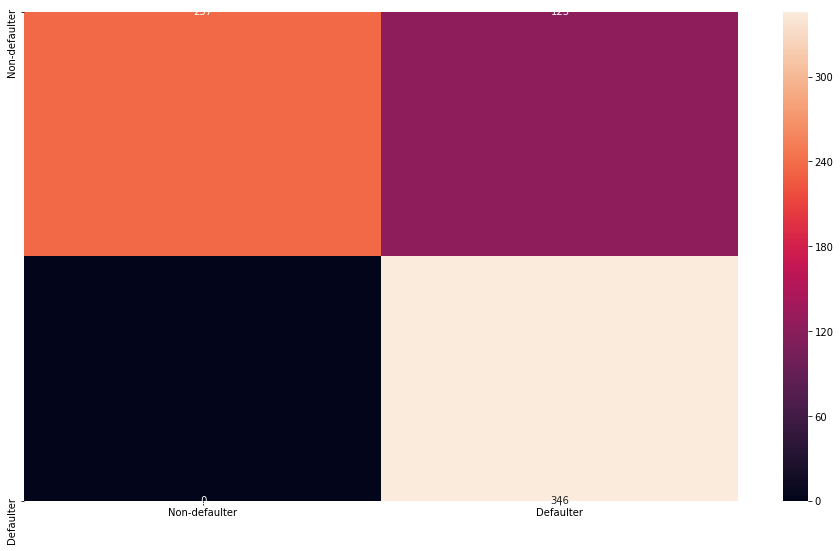

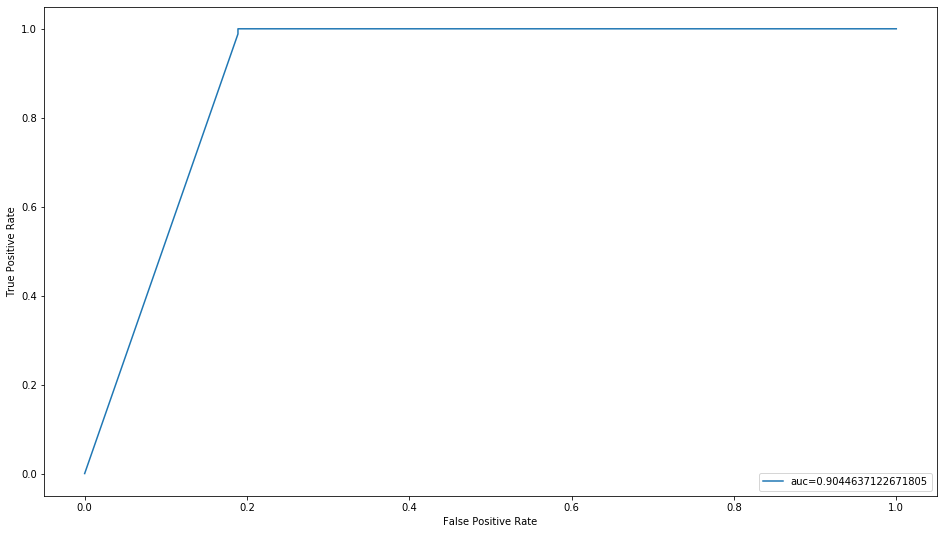


The average cross-validation score is 0.8452642093696933


In [31]:
#model tuning
param_grid = [
  {'n_neighbors': [3,5,10,15],'algorithm': ['ball_tree', 'kd_tree', 'brute'],'weights':['uniform','distance']}
    ]
model = KNeighborsClassifier()
model_gs = GridSearchCV(model,param_grid,cv=2,n_jobs=-1)
model_gs.fit(X_train,y_train)
print("The best estimator is : ",model_gs.best_estimator_)

#Classification report
pred_cv = model_gs.best_estimator_.predict(X_test)
print ("\nAccuracy with best estimator : ",accuracy_score(y_test,pred_cv))
print("\nKNeighbors Classification Report: \n",classification_report(y_test, pred_cv, target_names=None))

#Confusion Matrix
plt.figure(figsize=(16,9))
akws = {"ha": 'center',"va": 'center'}
sns.heatmap(confusion_matrix(y_test, pred_cv),annot=True,fmt='2.5g',annot_kws=akws,\
            xticklabels=["Non-defaulter","Defaulter"],\
           yticklabels=["Non-defaulter","Defaulter"])
plt.show()

#ROC curve
probs = model_gs.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(16,9))
plt.plot(fpr, tpr, label="auc="+str(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#Cross Validation Score
cv_scores = cross_val_score(model_gs.best_estimator_,X, y, cv=25, n_jobs=-1)
print("\nThe average cross-validation score is %s"%cv_scores.mean())

Again, the KNeighbors classifier failed to classify the defaulters for us. Lets move on to ensamble methods now.

### Random Forest

/Users/ankitkpr93/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


The best estimator is :  RandomForestClassifier(max_depth=8, n_estimators=75)

Accuracy with best estimator :  0.8909348441926346

Random Forest Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.85      0.89       360
           1       0.86      0.93      0.89       346

    accuracy                           0.89       706
   macro avg       0.89      0.89      0.89       706
weighted avg       0.89      0.89      0.89       706



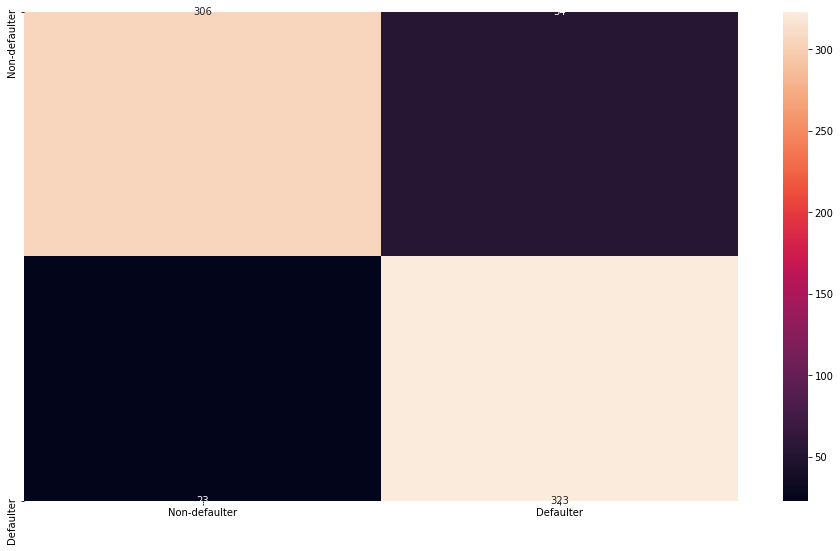

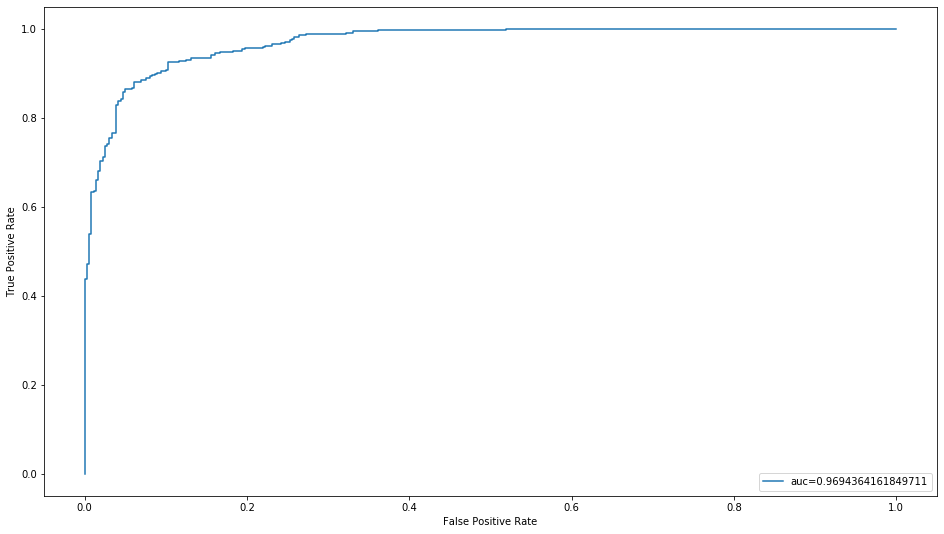


The average cross-validation score is 0.8846628708420736


In [32]:
#model tuning
param_grid = [
  {'n_estimators': [25,50,75],'max_depth': [2,4,6,8]}
    ]
model = RandomForestClassifier()
model_gs = GridSearchCV(model,param_grid,cv=10,n_jobs=-1)
model_gs.fit(X_train,y_train)
print("The best estimator is : ",model_gs.best_estimator_)

#Classification report
pred_cv = model_gs.best_estimator_.predict(X_test)
print ("\nAccuracy with best estimator : ",accuracy_score(y_test,pred_cv))
print("\nRandom Forest Classification Report: \n",classification_report(y_test, pred_cv, target_names=None))

#Confusion Matrix
plt.figure(figsize=(16,9))
akws = {"ha": 'center',"va": 'center'}
sns.heatmap(confusion_matrix(y_test, pred_cv),annot=True,fmt='2.5g',annot_kws=akws,\
            xticklabels=["Non-defaulter","Defaulter"],\
           yticklabels=["Non-defaulter","Defaulter"])
plt.show()

#ROC curve
probs = model_gs.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(16,9))
plt.plot(fpr, tpr, label="auc="+str(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#Cross Validation Score
cv_scores = cross_val_score(model_gs.best_estimator_,X, y, cv=25, n_jobs=-1)
print("\nThe average cross-validation score is %s"%cv_scores.mean())

### Decision Tree

The best estimator is :  DecisionTreeClassifier(max_depth=8)

Accuracy with best estimator :  0.7549575070821529

Decision Tree Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.66      0.73       360
           1       0.71      0.86      0.77       346

    accuracy                           0.75       706
   macro avg       0.77      0.76      0.75       706
weighted avg       0.77      0.75      0.75       706



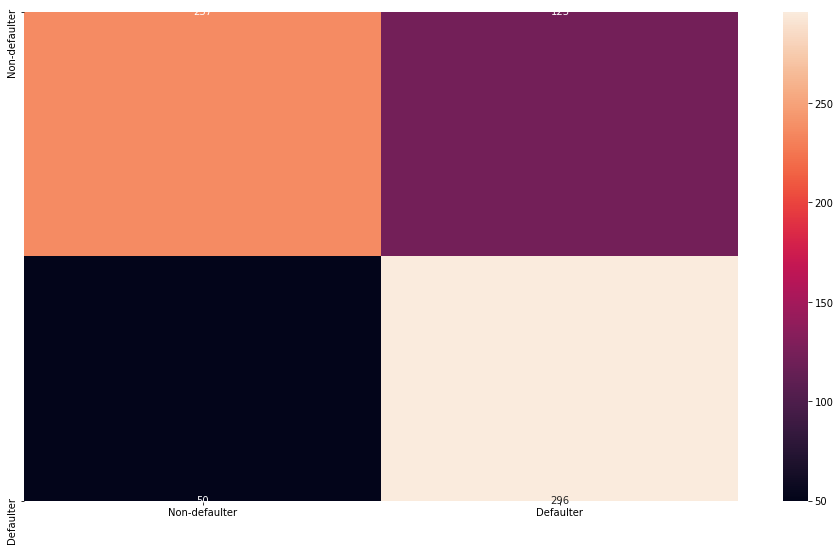

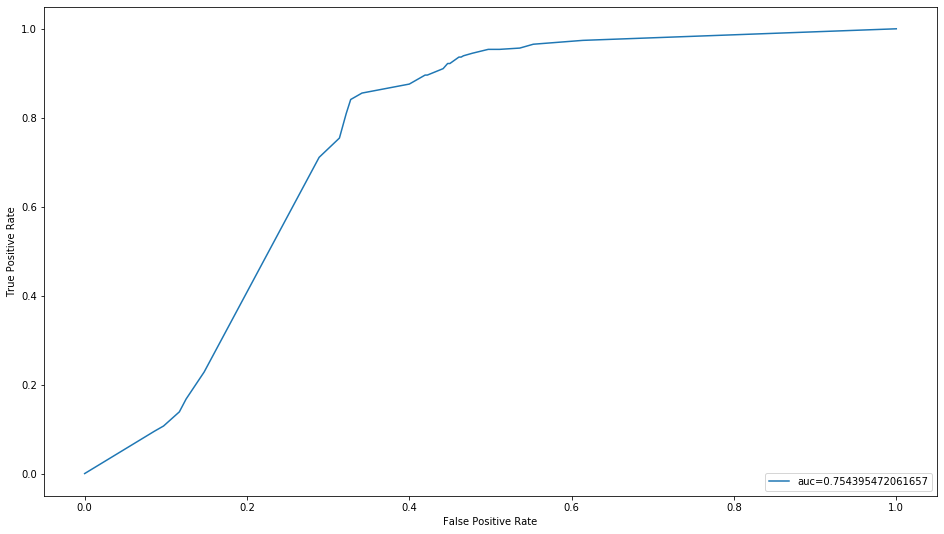


The average cross-validation score is 0.7673019678353812


In [33]:
#model tuning
param_grid = [
  {'max_depth': [2,4,6,8],'criterion':['entropy','gini']}
    ]
model = DecisionTreeClassifier()
model_gs = GridSearchCV(model,param_grid,cv=10,n_jobs=-1)
model_gs.fit(X_train,y_train)
print("The best estimator is : ",model_gs.best_estimator_)

#Classification report
pred_cv = model_gs.best_estimator_.predict(X_test)
print ("\nAccuracy with best estimator : ",accuracy_score(y_test,pred_cv))
print("\nDecision Tree Classification Report: \n",classification_report(y_test, pred_cv, target_names=None))

#Confusion Matrix
plt.figure(figsize=(16,9))
akws = {"ha": 'center',"va": 'center'}
sns.heatmap(confusion_matrix(y_test, pred_cv),annot=True,fmt='2.5g',annot_kws=akws,\
            xticklabels=["Non-defaulter","Defaulter"],\
           yticklabels=["Non-defaulter","Defaulter"])
plt.show()

#ROC curve
probs = model_gs.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(16,9))
plt.plot(fpr, tpr, label="auc="+str(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#Cross Validation Score
cv_scores = cross_val_score(model_gs.best_estimator_,X, y, cv=25, n_jobs=-1)
print("\nThe average cross-validation score is %s"%cv_scores.mean())

### SVC

The best estimator is :  SVC(C=10, gamma=0.01, probability=True)
Accuracy with best estimator :  0.9617563739376771
SVC Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96       360
           1       0.93      1.00      0.96       346

    accuracy                           0.96       706
   macro avg       0.96      0.96      0.96       706
weighted avg       0.96      0.96      0.96       706



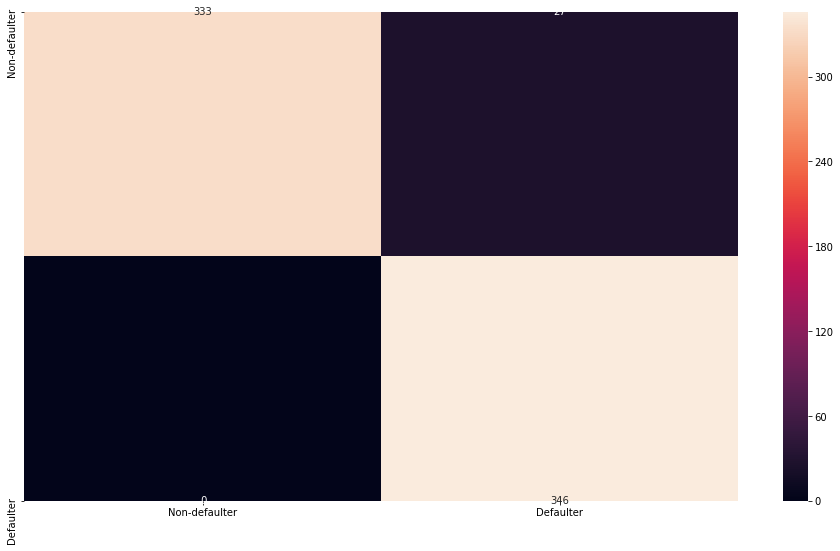

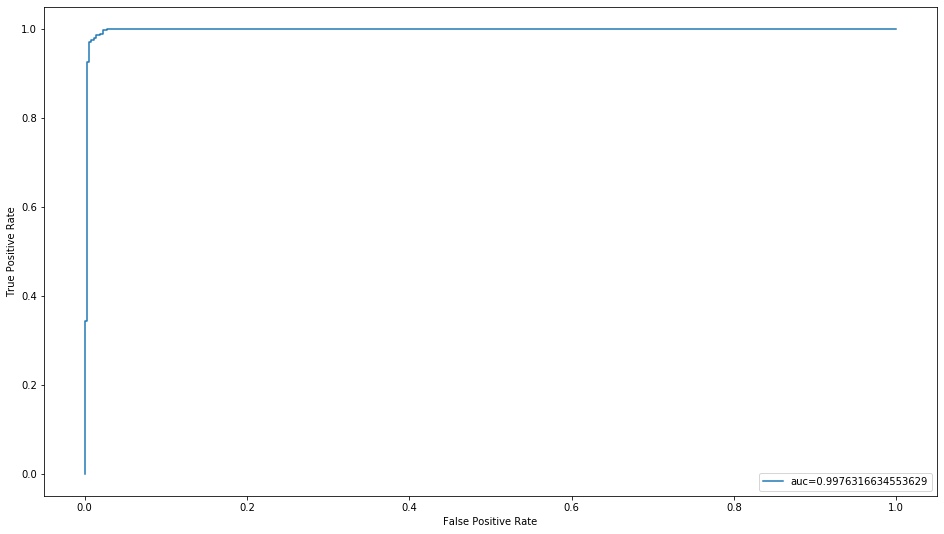

The average cross-validation score is 0.9730733324748906


In [34]:
#model tuning
param_grid = [
  {'C': [1,10], 'gamma':[0.01,0.001],'kernel': ['poly', 'rbf', 'sigmoid']}
    ]
model = svm.SVC(probability=True)
model_gs = GridSearchCV(model,param_grid,cv=2,n_jobs=-1)
model_gs.fit(X_train,y_train)
print("The best estimator is : ",model_gs.best_estimator_)

#Classification report
pred_cv = model_gs.best_estimator_.predict(X_test)
print ("Accuracy with best estimator : ",accuracy_score(y_test,pred_cv))
print("SVC Classification Report: \n",classification_report(y_test, pred_cv, target_names=None))
      
#Confusion Matrix
plt.figure(figsize=(16,9))
akws = {"ha": 'center',"va": 'center'}
sns.heatmap(confusion_matrix(y_test, pred_cv),annot=True,fmt='2.5g',annot_kws=akws,\
            xticklabels=["Non-defaulter","Defaulter"],\
           yticklabels=["Non-defaulter","Defaulter"])
plt.show()

#ROC curve
probs = model_gs.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(16,9))
plt.plot(fpr, tpr, label="auc="+str(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#Cross Validation Score
cv_scores = cross_val_score(model_gs.best_estimator_,X,y,cv=10,n_jobs=-1)
print("The average cross-validation score is %s"%cv_scores.mean())

### XGBoost

/Users/ankitkpr93/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


The best estimator is :  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=75, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy with best estimator :  0.9490084985835694

XGBoost Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       360
           1       0.92      0.98      0.95       346

    accuracy                           0.95       706
   macro avg       0.95      0.95      0.95       706
weighted avg       0.95      0.95   

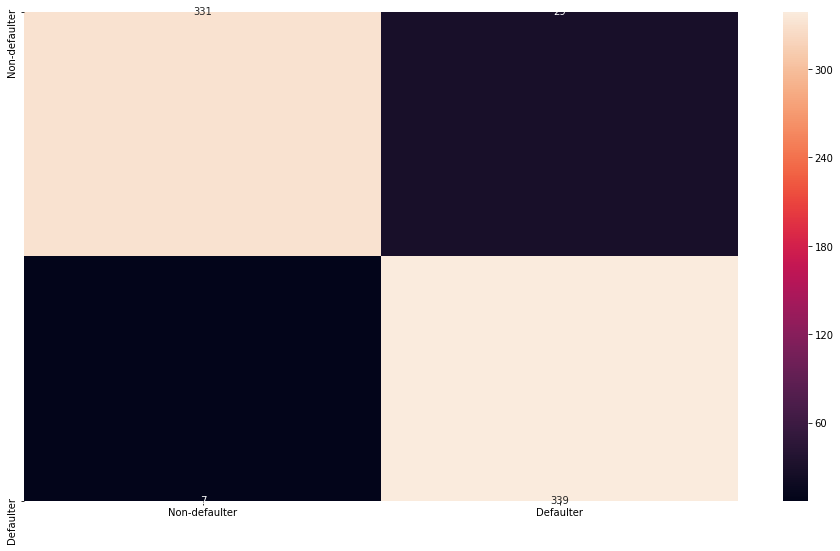

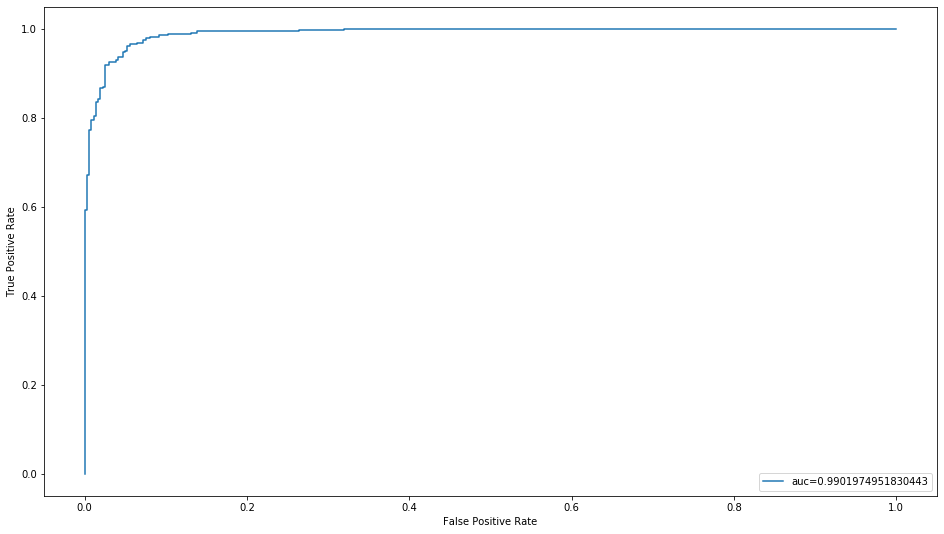


The average cross-validation score is 0.9492877834382178


In [35]:
#model tuning
param_grid = [
  {'n_estimators': [25,50,75],'max_depth': [2,4,6,8]}
    ]
model = XGBClassifier()
model_gs = GridSearchCV(model,param_grid,cv=10,n_jobs=-1)
model_gs.fit(X_train,y_train)
print("The best estimator is : ",model_gs.best_estimator_)

#Classification report
pred_cv = model_gs.best_estimator_.predict(X_test)
print ("\nAccuracy with best estimator : ",accuracy_score(y_test,pred_cv))
print("\nXGBoost Classification Report: \n",classification_report(y_test, pred_cv, target_names=None))

#Confusion Matrix
plt.figure(figsize=(16,9))
akws = {"ha": 'center',"va": 'center'}
sns.heatmap(confusion_matrix(y_test, pred_cv),annot=True,fmt='2.5g',annot_kws=akws,\
            xticklabels=["Non-defaulter","Defaulter"],\
           yticklabels=["Non-defaulter","Defaulter"])
plt.show()

#ROC curve
probs = model_gs.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(16,9))
plt.plot(fpr, tpr, label="auc="+str(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#Cross Validation Score
cv_scores = cross_val_score(model_gs.best_estimator_,X, y, cv=25, n_jobs=-1)
print("\nThe average cross-validation score is %s"%cv_scores.mean())

### References

1. https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html